In [1]:
%matplotlib notebook
import torch
import torch.nn
from torch.nn import functional as F
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation


In [2]:
#Data Init:
torch.manual_seed(2)
x = torch.linspace(-1,1,100)
x = torch.unsqueeze(x, dim = 1)
x.shape


torch.Size([100, 1])

<IPython.core.display.Javascript object>


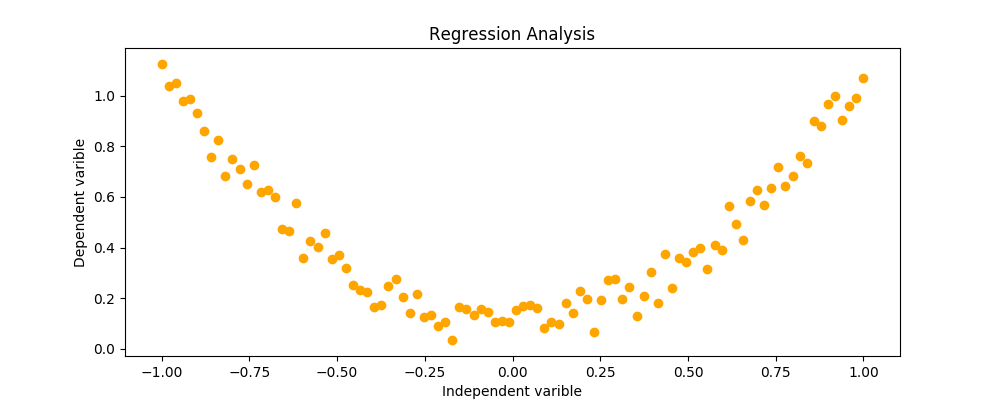

In [3]:
y = x.pow(2) + 0.2*torch.rand(x.size()) ##parabola with random noise
y.shape

plt.figure(figsize=(10,4))
plt.scatter(x.data.numpy(), y.data.numpy(), color = "orange")
plt.title('Regression Analysis')
plt.xlabel('Independent varible')
plt.ylabel('Dependent varible')
plt.show()

In [4]:
#Regression:
class Net(torch.nn.Module):
    def __init__(self, n_in, n_hidden, n_out):
        super(Net, self).__init__()
        self.hidden = torch.nn.Linear(n_in, n_hidden)
        self.pred = torch.nn.Linear(n_hidden, n_out)
    
    def forward(self, x):
        x = F.relu(self.hidden(x))
        x = self.pred(x)
        return(x)
    

net = Net(1,10,1)


In [5]:
optim = torch.optim.Adam(net.parameters(), lr = 0.1)
loss_f = torch.nn.MSELoss()


<IPython.core.display.Javascript object>


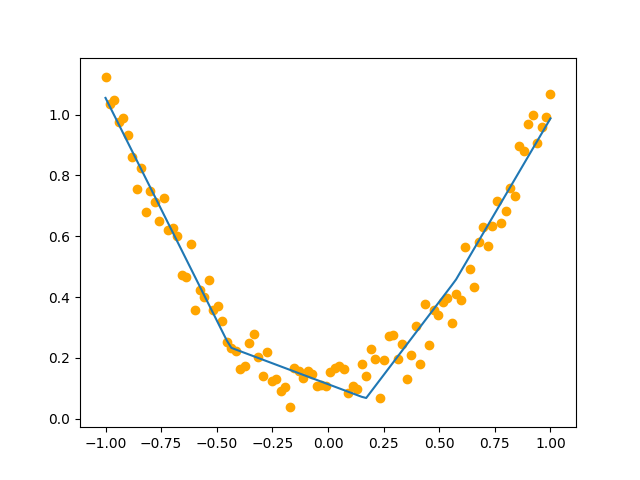

In [6]:
#Training:
pred_array = []
pred_array.append(net(x))
loss_metric = 0

fig, ax = plt.subplots()
x_axis = x.data.numpy()
line, = ax.plot(x_axis, y.data.numpy())

for epoch in range(200):
    
    pred = net(x)
    pred_array.append(pred.data.numpy())
    
    loss = loss_f(pred,y)
    optim.zero_grad()
    loss.backward()
    optim.step()
    
#     if (epoch % 50 == 0):
#         plt.clf()
#         print(epoch)
#         print(loss_metric)
#         plt.scatter(x.data.numpy(), y.data.numpy(), color = "orange")
#         plt.plot(x.data.numpy(), pred.data.numpy(), color = "red")
#         plt.show()
def animate(i):
    line.set_ydata(pred_array[i])  # update the data
    return line,

def init():
    line.set_ydata(np.ma.array(x.data.numpy(), mask=True))
    return line,

ani = FuncAnimation(fig, animate, np.arange(1, 200), init_func=init,
                              interval=50, blit=True)

plt.scatter(x.data.numpy(), y.data.numpy(), color = "orange")
plt.show()